<a href="https://colab.research.google.com/github/rsmarinho/pdscodes/blob/master/TP07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# here goes your include modules...
import numpy as np
import matplotlib.pyplot as plt

# in this TP we will use scipy modul to read the files
from scipy.io import wavfile
# if you rather to use librosa, use the lines below
import librosa

# below are the module used to play the audio vectors in jupyterlab
from IPython.display import Audio



**TP07 - Sistemas de comunicação (Digital).**

---

Sistemas de comunicação modernos utilizam modulações digitais para diminuir as alterações do sinal enviado ao longo do canal. Na modulação anaógica as alterações exercidas pelo canal implica em uma alta sensibilidade da informação que trafega por um canal.

Nesse TP, utilizaremos dois tipos de modulação, BPSK e QPSK. Bem como nos outros trabalhos, vamos primeiramente tentar compreender as ferramentas para posteriormente resolver uma série de problemas propostos. 

Muita atenção nesse TP, você deverá utilizar muita informação adquirida ao longo do curso e que está dormente em seu cérebro...

In [2]:
sigSize = 10
data = np.array([np.random.randint(0,2) for i in range(sigSize)])

print(data)

[0 0 0 1 0 1 0 0 1 1]


In [3]:
# Eb = bit energy
# Tb = bit duration
# sr = sample rate
def bpsk_signaling(data, Eb=1, Tb=2, sr=10):
  N = len(data)
  sig_timelength = int(N*Tb)
  t = np.linspace(0, sig_timelength, N*sr)
  
  signaling = np.zeros((N, sr))
  for i in range(N):
    signaling[i,:] = data[i]
  signaling = signaling.reshape(t.shape)
  signaling = 2 * Eb * signaling - Eb
  return t, signaling

def bpsk(data, Eb=1, Tb=2, freq=2, sr=10):
  t, s = bpsk_signaling(data, Eb=Eb, Tb=Tb, sr=sr)    
  return t, np.sqrt(2*Eb/Tb) * np.cos(2*np.pi*freq* t) * s

[-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.]


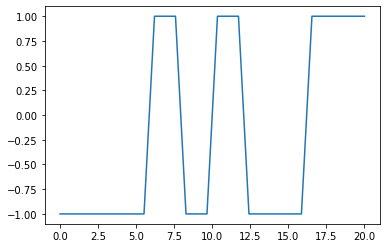

In [4]:
t, s = bpsk_signaling(data, sr = 3)
print(s)
plt.plot(t,s)

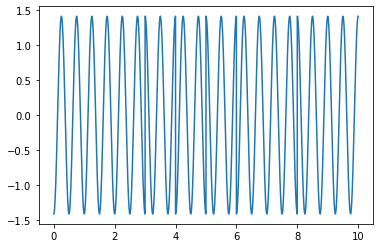

In [5]:
t, s = bpsk(data, Eb = 1, freq = 2, Tb = 1, sr = 44100)
plt.plot(t, s)

In [6]:
t, s = bpsk(data, Eb = 0.1, freq = 1000, Tb = 1, sr = 44100)

In [7]:
 Audio(s, rate=44100)

In [8]:
# Eb = bit energy
# Tb = bit duration
# sr = sample rate
def qpsk_signaling(data, Eb=1, Tb=2, sr=10):
  N = int(len(data)/2)

  I_sig = [i for i in range(data.size) if i % 2 == 0]
  Q_sig = [i for i in range(data.size) if i % 2 == 1]

  sig_timelength = int(N*Tb)
  t = np.linspace(0, sig_timelength, N*sr)
  
  I_signaling = np.zeros((N, sr))
  Q_signaling = np.zeros((N, sr))
  
  for i in range(N):
    I_signaling[i,:] = data[int(I_sig[i])]
    Q_signaling[i,:] = data[int(Q_sig[i])]
  I_signaling = I_signaling.reshape(t.shape)
  Q_signaling = Q_signaling.reshape(t.shape)

  I_signaling = 2 * Eb * I_signaling - Eb
  Q_signaling = 2 * Eb * Q_signaling - Eb
  return t, I_signaling, Q_signaling

def qpsk(data, Eb=1, Tb=2, freq=2, sr=10):
  t, i_s, q_s = qpsk_signaling(data, Eb=Eb, Tb=Tb, sr=sr)    
  return t, np.sqrt(2*Eb/Tb) * ( np.sin(2*np.pi*freq* t) * i_s + np.cos(2*np.pi*freq* t) * q_s )

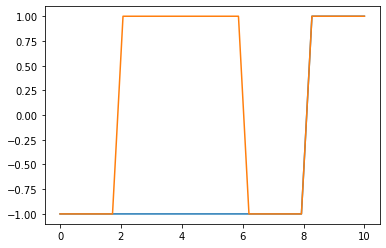

In [9]:
t, i_s, q_s = qpsk_signaling(data, sr = 6)
# print(i_s)
# print(q_s)
plt.plot(t, i_s)
plt.plot(t, q_s)

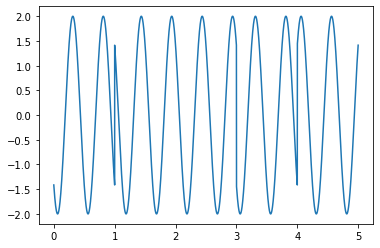

In [10]:
t, s = qpsk(data, Eb = 1, freq = 2, Tb = 1, sr = 44100)
plt.plot(t, s)

In [11]:
t, s = qpsk(data, Eb = 0.1, freq = 1000, Tb = 1, sr = 44100)
Audio(s, rate=44100)

---

**1.** O código ``` t, s = bpsk(data, Eb = 1, freq = 1000, Tb = 1, sr = 44100)``` gera um sinal bpsk modulado em uma frequência de amostragem de 44100 Hz a partir de uma sequência binária ```data```. A frequência da onda portadora do sinal é de 1 kHz. Utilizando seus conhecimento de PDS, Comunicação Digital e Processos Estocásticos, faça uma função que retorne a sequência original ```data``` a partir do sinal bpsk.

DICA: Suponha que o sinal é síncrono, ou seja, que você sabe quando é o início e o fim de cada símbolo, e calcule a ortogonalidade de funções conhecidas de mesmo tamanho.

**2.** Um canal AWGN é um canal aditivo que adiciona (Aditive) ao sinal enviado ruído branco gaussiano (White Gaussian Noise). Em simulação um canal desse tipo é usualmente simulado com uma função geradora de números aleatórios com distribuição normal (```randn()```). A variancia de uma variável aleatória simulada pode ser variada multiplicando a função randn() por um valor que indica o desvio padrão da função de distribuição. Então, por exemplo:

(-6.0, 6.0)

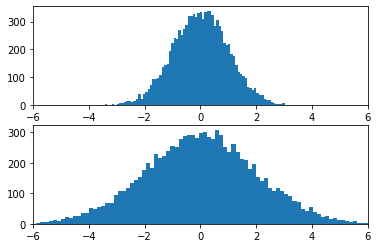

In [12]:
plt.subplot(211)
plt.hist(np.random.randn(10000),bins=100)
plt.xlim([-6,6])

plt.subplot(212)
plt.hist(np.random.randn(10000)*2,bins=100)
plt.xlim([-6,6])

Ou seja, no caso de definir o sinal/canal em função da relação sinal ruído (SNR) devemos proseguir da seguinte forma:
```
   variance = 10^(-snr/10);
   noise = sqrt(variance)*randn();
```
Por exemplo:

(-6.0, 6.0)

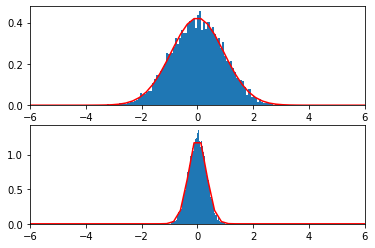

In [13]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = np.sqrt(np.pi * 2)
    return (1 / (sqrt_two_pi * sigma)) * np.exp(-0.5 * np.power((x - mu)/sigma, 2) )

snr = np.array([0.5, 10])

variance = np.power(10,(-snr/10))
noise = np.random.randn(10000);

plt.subplot(211)
# plot do histograma
plt.hist(noise*np.sqrt(variance[0]),bins=100,density=True)
# plot da FDP gaussiana
plt.plot(np.linspace(-6,6), normal_pdf(np.linspace(-6,6), sigma=np.sqrt(variance[0])), 'r')
plt.xlim([-6,6])

plt.subplot(212)
# plot do histograma
plt.hist(noise*np.sqrt(variance[1]),bins=100,density=True)
# plot da FDP gaussiana
plt.plot(np.linspace(-6,6), normal_pdf(np.linspace(-6,6), sigma=np.sqrt(variance[1])), 'r')
plt.xlim([-6,6])

Com base nessas informações, faça um modelo de canal em que o sinal enviado seja corrompido por ruído aditivo gaussiano de diferentes valores de energia, e utilize a função da questão 01 para obter a sequência de bits a partir do sinal corrompido. 

Em outras palavras: varie a SNR (0.1, 0.2, 1, 5, 10, por exemplo), e utilize a função que você criou na questão 1 para tentar obter a sequência original.